In [5]:
!pip install gql requests

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.6/bin/python3.6 -m pip install --upgrade pip' command.


In [6]:
import requests
from IPython.display import display, Markdown
from gql import gql, Client
from gql.transport.requests import RequestsHTTPTransport

_transport = RequestsHTTPTransport(
    url='https://api.datacite.org/graphql',
    use_json=True,
)


client = Client(
    transport=_transport,
    fetch_schema_from_transport=True,
)

In [7]:
# Generate the GraphQL query: find all outputs FREYA project (https://cordis.europa.eu/project/id/777523) to date
query = gql("""
{
  works(query: "fundingReferences.awardNumber:777523", first: 75) {
    totalCount
    years {
      title
      count
    }
    nodes {
      id
      type
      bibtex
      titles {
        title
      }
      descriptions {
        description
      }
      creators {
        id
        name
        affiliation {
          id
          name
        }
      }
      fundingReferences {
        funderIdentifier
        funderName
        awardNumber
        awardTitle
      }
      citationCount
      viewCount
      downloadCount
    }
  }
}
""")

In [8]:
data = client.execute(query)

In [10]:
# Get the total number of outputs to date
display(Markdown(str(data['works']['totalCount'])))

67

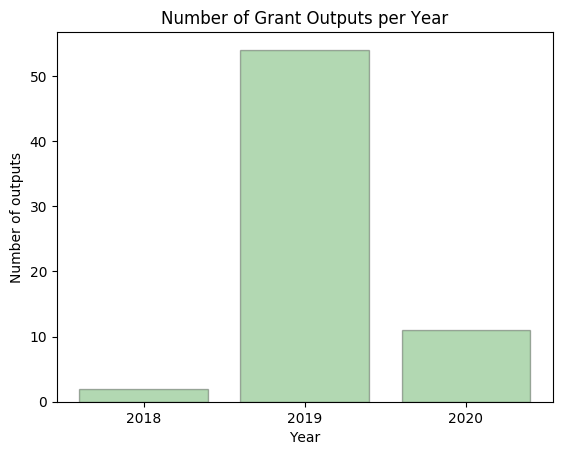

In [11]:
# Plot the total number of outputs to date, by year
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np

plt.rcdefaults()


years = [s['title'] for s in data['works']['years']]
num_outputs = [s['count'] for s in data['works']['years']]

fig, ax = plt.subplots()
x_pos = np.arange(len(years))
ax.bar(x_pos, num_outputs, align='center', color='green', edgecolor='black', linewidth=1, alpha=0.3)
ax.set_xticks(x_pos)
ax.set_xticklabels(years)
ax.invert_xaxis()  # labels read top-to-bottom 
ax.set_ylabel('Number of outputs')
ax.set_xlabel('Year')
ax.set_title('Number of Grant Outputs per Year')
plt.show()


In [20]:
from IPython.core.display import display, HTML

# Get details for each output
outputs = [['ID','Type','Titles','Creators','Funders','Award Numbers','Award Titles', 'Number of Citations', 'Number of Views', 'Number of Downloads']]
for r in data['works']['nodes']:
    id = '<a href="%s">%s</a></html>' % (r['id'], '/'.join(r['id'].split("/")[3:]))
    titles = '; '.join([s['title'] for s in r['titles']])
    creators = '; '.join(['<a href="%s">%s</a>' % (s['id'],s['name']) for s in r['creators']])
    funders = '; '.join(set(['<a href="%s">%s</a>' % (s['funderIdentifier'],s['funderName']) for s in r['fundingReferences']]))
    award_numbers = '; '.join([s['awardNumber'] for s in r['fundingReferences']])
    award_titles = '; '.join([s['awardTitle'] for s in r['fundingReferences']])
    output = [id, r['type'], titles, creators, funders, award_numbers, award_titles, str(r['citationCount']), str(r['viewCount']), str(r['downloadCount'])]
    outputs += [output]
    
# Display outputs as html table 
html_table = '<html><table>'   
html_table += '<tr><th style="text-align:center;">' + '</th><th style="text-align:center;">'.join(outputs[0]) + '</th></tr>'
for row in outputs[1:]:
    html_table += '<tr><td style="text-align:left;">' + '</td><td style="text-align:left;">'.join(row) + '</td></tr>'
html_table += '</table></html>'
display(HTML(html_table))

ID,Type,Titles,Creators,Funders,Award Numbers,Award Titles,Number of Citations,Number of Views,Number of Downloads
10.5281/zenodo.1263942,Dataset,Listing of data repositories that embed schema.org metadata in dataset landing pages,"Fenner, Martin; Crosas, Merce; Durand, Gustavo; Wimalaratne, Sarala; Gräf, Florian; Hallett, Richard; Bernal Llinares, Manuel; Schindler, Uwe; Clark, Tim",European Commission,777523,"Connected Open Identifiers for Discovery, Access and Use of Research Resources",1,0,0
10.5281/zenodo.3248652,Text,D2.2 PID Metadata Provenance,"Fenner, Martin; Wass, Joe; Demeranville, Tom; Wimalaratne, Sarala; Hallett, Richard",European Commission,777523,"Connected Open Identifiers for Discovery, Access and Use of Research Resources",1,0,0
10.5281/zenodo.2549228,Text,From Standard to Community Resource: A View on ISNIs and ORG IDs,"Reimer, Torsten; Madden, Frances",European Commission,777523,"Connected Open Identifiers for Discovery, Access and Use of Research Resources",0,0,0
10.5281/zenodo.3361511,Text,RDA Europe Update,"Brown, Christopher",European Commission,777523; 777388,"Connected Open Identifiers for Discovery, Access and Use of Research Resources; The European plug-in to the global Research Data Alliance",0,0,0
10.5281/zenodo.3361398,Text,JISC and PIDs,"Brown, Christopher",European Commission,777523; 777388,"Connected Open Identifiers for Discovery, Access and Use of Research Resources; The European plug-in to the global Research Data Alliance",0,0,0
10.5281/zenodo.3564209,Text,(Effectively) Communicating your research online presentations,"Morselli, Francesca; Madden, Frances; Burton, Kath; Blaney, Jonathan",European Commission,777523,"Connected Open Identifiers for Discovery, Access and Use of Research Resources",0,0,0
10.14454/3bpw-w381,Software,Jupyter Notebook FREYA PID Graph Key Performance Indicators (KPIs),"Fenner, Martin",European Commission,777523,"Connected Open Identifiers for Discovery, Access and Use of Research Resources",0,0,0
10.5281/zenodo.3674734,Text,Building the Picture behind a Dataset,"Madden, Frances; Cope, Jez; Ashton, Jan",European Commission,777523,"Connected Open Identifiers for Discovery, Access and Use of Research Resources",0,0,0
10.5281/zenodo.3361419,Text,STFC case study: PhD research graph,"Bunakov, Vasily",European Commission,777523; 777388,"Connected Open Identifiers for Discovery, Access and Use of Research Resources; The European plug-in to the global Research Data Alliance",0,0,0
10.5281/zenodo.2549227,Text,From Standard to Community Resource: A View on ISNIs and ORG IDs,"Reimer, Torsten; Madden, Frances",European Commission,777523,"Connected Open Identifiers for Discovery, Access and Use of Research Resources",0,0,0


In [18]:
from IPython.core.display import display, HTML

# Get bibtex entry for each output
outputs = [['ID','BibTeX']]
for r in data['works']['nodes']:
    id = '<a href="%s">%s</a></html>' % (r['id'], '/'.join(r['id'].split("/")[3:]))
    bibtex = r['bibtex']
    output = [id, bibtex]
    outputs += [output]
    
# Display outputs as html table 

html_table = '<html><table>'   
html_table += '<tr><th style="text-align:center;">' + '</th><th style="text-align:center;">'.join(outputs[0]) + '</th></tr>'
for row in outputs[1:]:
    html_table += '<tr><td style="text-align:left;">' + '</td><td style="text-align:left;">'.join(row) + '</td></tr>'
html_table += '</table></html>'
display(HTML(html_table))

ID,BibTeX
10.5281/zenodo.1263942,"@misc{https://doi.org/10.5281/zenodo.1263942, doi = {10.5281/ZENODO.1263942}, url = {https://zenodo.org/record/1263942}, author = {Fenner, Martin and Crosas, Merce and Durand, Gustavo and Wimalaratne, Sarala and Gräf, Florian and Hallett, Richard and Bernal Llinares, Manuel and Schindler, Uwe and Clark, Tim}, keywords = {schema_org, landing page, dataset}, language = {en}, title = {Listing of data repositories that embed schema.org metadata in dataset landing pages}, publisher = {Zenodo}, year = {2018} }"
10.5281/zenodo.3248652,"@article{https://doi.org/10.5281/zenodo.3248652, doi = {10.5281/ZENODO.3248652}, url = {https://zenodo.org/record/3248652}, author = {Fenner, Martin and Wass, Joe and Demeranville, Tom and Wimalaratne, Sarala and Hallett, Richard}, keywords = {PID, PID resolution, PID infrastructure, FREYA, EOSC, PID network}, language = {en}, title = {D2.2 PID Metadata Provenance}, publisher = {Zenodo}, year = {2019} }"
10.5281/zenodo.2549228,"@article{https://doi.org/10.5281/zenodo.2549228, doi = {10.5281/ZENODO.2549228}, url = {https://zenodo.org/record/2549228}, author = {Reimer, Torsten and Madden, Frances}, keywords = {PIDs, ISNI, Organisational Identifiers}, language = {en}, title = {From Standard to Community Resource: A View on ISNIs and ORG IDs}, publisher = {Zenodo}, year = {2019} }"
10.5281/zenodo.3361511,"@article{https://doi.org/10.5281/zenodo.3361511, doi = {10.5281/ZENODO.3361511}, url = {https://zenodo.org/record/3361511}, author = {Brown, Christopher}, keywords = {RDA, Research Data Alliance}, title = {RDA Europe Update}, publisher = {Zenodo}, year = {2019} }"
10.5281/zenodo.3361398,"@article{https://doi.org/10.5281/zenodo.3361398, doi = {10.5281/ZENODO.3361398}, url = {https://zenodo.org/record/3361398}, author = {Brown, Christopher}, title = {JISC and PIDs}, publisher = {Zenodo}, year = {2019} }"
10.5281/zenodo.3564209,"@article{https://doi.org/10.5281/zenodo.3564209, doi = {10.5281/ZENODO.3564209}, url = {https://zenodo.org/record/3564209}, author = {Morselli, Francesca and Madden, Frances and Burton, Kath and Blaney, Jonathan}, title = {(Effectively) Communicating your research online presentations}, publisher = {Zenodo}, year = {2019} }"
10.14454/3bpw-w381,"@misc{https://doi.org/10.14454/3bpw-w381, doi = {10.14454/3BPW-W381}, url = {https://github.com/datacite/pidgraph-notebooks-r/tree/master/kpi}, author = {Fenner, Martin}, keywords = {pid graph, graphql, kpi, freya, eosc}, title = {Jupyter Notebook FREYA PID Graph Key Performance Indicators (KPIs)}, publisher = {DataCite}, year = {2019} }"
10.5281/zenodo.3674734,"@article{https://doi.org/10.5281/zenodo.3674734, doi = {10.5281/ZENODO.3674734}, url = {https://zenodo.org/record/3674734}, author = {Madden, Frances and Cope, Jez and Ashton, Jan}, title = {Building the Picture behind a Dataset}, publisher = {Zenodo}, year = {2020} }"
10.5281/zenodo.3361419,"@article{https://doi.org/10.5281/zenodo.3361419, doi = {10.5281/ZENODO.3361419}, url = {https://zenodo.org/record/3361419}, author = {Bunakov, Vasily}, title = {STFC case study: PhD research graph}, publisher = {Zenodo}, year = {2019} }"
10.5281/zenodo.2549227,"@article{https://doi.org/10.5281/zenodo.2549227, doi = {10.5281/ZENODO.2549227}, url = {https://zenodo.org/record/2549227}, author = {Reimer, Torsten and Madden, Frances}, keywords = {PIDs, ISNI, Organisational Identifiers}, language = {en}, title = {From Standard to Community Resource: A View on ISNIs and ORG IDs}, publisher = {Zenodo}, year = {2019} }"
